<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/Procesamiento_natural_de_lenguaje_ajustado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ NLTK cargado exitosamente
🚀 PROCESAMIENTO DE LENGUAJE NATURAL DESDE CERO

🎬 Iniciando demostración completa de NLP...

🎯 PROBLEMA 1: IMPLEMENTACIÓN DE BOW DESDE CERO

📝 Oraciones de ejemplo:
  0: ¡Esta película es MUY divertida!
  1: ¡Qué película! ¡
  2: La mejor película de la historia! Esta película

🔢 1. BoW con 1-gramas:
----------------------------------------
🔧 Entrenando BoW desde cero...
✅ Vocabulario creado con 10 características
📚 Vocabulario (1-gramas):
  ['esta', 'película', 'es', 'muy', 'divertida', 'qué', 'la', 'mejor', 'de', 'historia']

📊 Matriz BoW (1-gramas):
   esta  película   es  muy  divertida  qué   la  mejor   de  historia
0   1.0       1.0  1.0  1.0        1.0  0.0  0.0    0.0  0.0       0.0
1   0.0       1.0  0.0  0.0        0.0  1.0  0.0    0.0  0.0       0.0
2   1.0       2.0  0.0  0.0        0.0  0.0  2.0    1.0  1.0       1.0

🔢 2. BoW con 2-gramas:
----------------------------------------
🔧 Entrenando BoW desde cero...
✅ Vocabulario creado con 11 carac

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


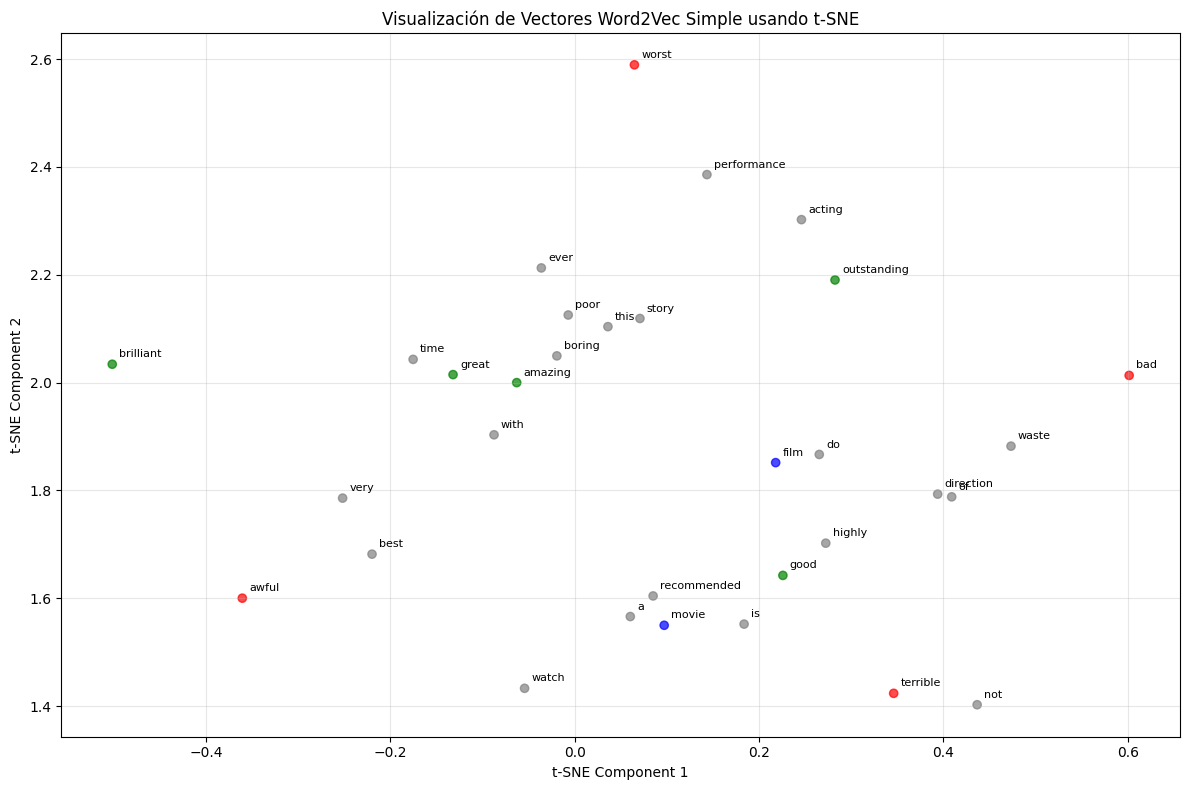

✅ PROBLEMA 7 COMPLETADO: Visualización vectorial

🎯 PROBLEMA 8: CLASIFICACIÓN CON WORD2VEC SIMPLE

📁 Cargando datos de IMDB...
Nota: Usando datos sintéticos para demostración
📊 Número de reseñas: 20
📊 Distribución de etiquetas: Counter({1: 10, 0: 10})
📊 Nombres de etiquetas: ['neg', 'pos']
🔧 Preprocesando corpus...
✅ Preprocesamiento completado. 20 textos procesados
📊 Datos de entrenamiento: 16
📊 Datos de prueba: 4

🔧 Entrenando Word2Vec simple...
🔧 Entrenando Word2Vec simple...
✅ Vocabulario creado con 26 palabras
📚 Vocabulario entrenado: 26 palabras

🔄 Convirtiendo textos a vectores...
📊 Dimensiones de entrenamiento: (16, 10)
📊 Dimensiones de prueba: (4, 10)

🤖 Entrenando clasificador...
🔮 Realizando predicciones...
📈 Precisión: 0.5000

📋 Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         2
    positivo       0.00      0.00      0.00         2

    accuracy                           0.50         4
   ma

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from collections import Counter, defaultdict
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
import seaborn as sns

# Configuración para Google Colab
plt.style.use('default')
sns.set_palette("husl")

# Intentar cargar NLTK (opcional)
try:
    import nltk
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    from nltk.corpus import stopwords
    NLTK_AVAILABLE = True
    print("✅ NLTK cargado exitosamente")
except:
    NLTK_AVAILABLE = False
    print("⚠️ NLTK no disponible, usando palabras vacías por defecto")

"""
================================================================================
PROCESAMIENTO DE LENGUAJE NATURAL (NLP) DESDE CERO
================================================================================
"""

def create_sample_dataset():
    """Crear conjunto de datos de ejemplo para demostración"""
    positive_reviews = [
        "This movie is absolutely fantastic! I loved every minute of it.",
        "Amazing film with great acting and wonderful story.",
        "Best movie I have ever seen. Highly recommended!",
        "Outstanding performance by all actors. Great cinematography.",
        "Wonderful movie that kept me engaged throughout.",
        "Excellent film with brilliant direction and acting.",
        "Fantastic movie with amazing special effects.",
        "Great story and wonderful characters. Loved it!",
        "Outstanding film that exceeded my expectations.",
        "Brilliant movie with great plot and acting."
    ]

    negative_reviews = [
        "This movie is terrible. Complete waste of time.",
        "Awful film with bad acting and poor story.",
        "Worst movie I have ever seen. Don't watch it.",
        "Terrible performance by all actors. Bad cinematography.",
        "Boring movie that made me want to leave.",
        "Poor film with terrible direction and acting.",
        "Horrible movie with awful special effects.",
        "Bad story and terrible characters. Hated it!",
        "Disappointing film that failed to meet expectations.",
        "Terrible movie with poor plot and acting."
    ]

    reviews = positive_reviews + negative_reviews
    labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

    return reviews, labels

def load_imdb_data():
    """Cargar datos de IMDB"""
    print("📁 Cargando datos de IMDB...")
    print("Nota: Usando datos sintéticos para demostración")

    reviews, labels = create_sample_dataset()

    print(f"📊 Número de reseñas: {len(reviews)}")
    print(f"📊 Distribución de etiquetas: {Counter(labels)}")
    print(f"📊 Nombres de etiquetas: ['neg', 'pos']")

    return reviews, labels

class BagOfWordsScratch:
    """Implementación de Bag of Words desde cero"""

    def __init__(self, ngram_range=(1, 1), token_pattern=r'\b\w+\b'):
        self.ngram_range = ngram_range
        self.token_pattern = token_pattern
        self.vocabulary = {}
        self.is_fitted = False

    def _tokenize(self, text):
        text = text.lower()
        tokens = re.findall(self.token_pattern, text)
        return tokens

    def _create_ngrams(self, tokens, n):
        if n == 1:
            return tokens

        ngrams = []
        for i in range(len(tokens) - n + 1):
            ngram = ' '.join(tokens[i:i+n])
            ngrams.append(ngram)

        return ngrams

    def _extract_features(self, text):
        tokens = self._tokenize(text)
        features = []

        for n in range(self.ngram_range[0], self.ngram_range[1] + 1):
            ngrams = self._create_ngrams(tokens, n)
            features.extend(ngrams)

        return features

    def fit(self, texts):
        print("🔧 Entrenando BoW desde cero...")

        all_features = []
        for text in texts:
            features = self._extract_features(text)
            all_features.extend(features)

        feature_counts = Counter(all_features)
        self.vocabulary = {feature: idx for idx, feature in enumerate(feature_counts.keys())}

        self.is_fitted = True
        print(f"✅ Vocabulario creado con {len(self.vocabulary)} características")

    def transform(self, texts):
        if not self.is_fitted:
            raise ValueError("El vectorizador debe ser entrenado primero")

        n_texts = len(texts)
        n_features = len(self.vocabulary)

        vectors = np.zeros((n_texts, n_features))

        for i, text in enumerate(texts):
            features = self._extract_features(text)
            feature_counts = Counter(features)

            for feature, count in feature_counts.items():
                if feature in self.vocabulary:
                    idx = self.vocabulary[feature]
                    vectors[i, idx] = count

        return vectors

    def fit_transform(self, texts):
        self.fit(texts)
        return self.transform(texts)

def test_bow_scratch():
    """Probar implementación de BoW desde cero"""
    print("=" * 60)
    print("🎯 PROBLEMA 1: IMPLEMENTACIÓN DE BOW DESDE CERO")
    print("=" * 60)
    print()

    sentences = [
        "¡Esta película es MUY divertida!",
        "¡Qué película! ¡",
        "La mejor película de la historia! Esta película"
    ]

    print("📝 Oraciones de ejemplo:")
    for i, sentence in enumerate(sentences):
        print(f"  {i}: {sentence}")
    print()

    # 1-gramas
    print("🔢 1. BoW con 1-gramas:")
    print("-" * 40)

    bow_1gram = BagOfWordsScratch(ngram_range=(1, 1))
    vectors_1gram = bow_1gram.fit_transform(sentences)

    vocab_1gram = list(bow_1gram.vocabulary.keys())
    print("📚 Vocabulario (1-gramas):")
    print(f"  {vocab_1gram}")
    print()

    print("📊 Matriz BoW (1-gramas):")
    df_1gram = pd.DataFrame(vectors_1gram, columns=vocab_1gram)
    print(df_1gram)
    print()

    # 2-gramas
    print("🔢 2. BoW con 2-gramas:")
    print("-" * 40)

    bow_2gram = BagOfWordsScratch(ngram_range=(2, 2))
    vectors_2gram = bow_2gram.fit_transform(sentences)

    vocab_2gram = list(bow_2gram.vocabulary.keys())
    print("📚 Vocabulario (2-gramas):")
    print(f"  {vocab_2gram}")
    print()

    print("📊 Matriz BoW (2-gramas):")
    df_2gram = pd.DataFrame(vectors_2gram, columns=vocab_2gram)
    print(df_2gram)
    print()

    print("✅ PROBLEMA 1 COMPLETADO: BoW implementado desde cero")
    print()

    return bow_1gram, bow_2gram

def test_tfidf():
    """Probar TF-IDF con datos de IMDB"""
    print("=" * 60)
    print("🎯 PROBLEMA 2: CÁLCULO DE TF-IDF")
    print("=" * 60)
    print()

    reviews, labels = load_imdb_data()

    X_train, X_test, y_train, y_test = train_test_split(
        reviews, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"📊 Datos de entrenamiento: {len(X_train)}")
    print(f"📊 Datos de prueba: {len(X_test)}")
    print()

    # Obtener palabras vacías
    if NLTK_AVAILABLE:
        try:
            stop_words = stopwords.words('english')
            print(f"🛑 Palabras vacías cargadas: {len(stop_words)}")
        except:
            stop_words = ['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']
            print(f"🛑 Usando palabras vacías por defecto: {len(stop_words)}")
    else:
        stop_words = ['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by']
        print(f"🛑 Usando palabras vacías por defecto: {len(stop_words)}")

    print()

    # Configurar TF-IDF
    print("⚙️ Configurando TF-IDF...")
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,
        stop_words=stop_words,
        ngram_range=(1, 2),
        token_pattern=r'\b\w+\b',
        norm='l2'
    )

    print("🔧 Entrenando TF-IDF...")
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    print(f"📊 Dimensiones de entrenamiento: {X_train_tfidf.shape}")
    print(f"📊 Dimensiones de prueba: {X_test_tfidf.shape}")
    print()

    feature_names = tfidf_vectorizer.get_feature_names_out()
    print(f"📚 Número de características: {len(feature_names)}")
    print(f"📚 Primeras 20 características: {feature_names[:20].tolist()}")
    print()

    print("✅ PROBLEMA 2 COMPLETADO: TF-IDF calculado con scikit-learn")
    print()

    return tfidf_vectorizer, X_train_tfidf, X_test_tfidf, y_train, y_test

def test_classification_with_tfidf():
    """Probar clasificación con TF-IDF"""
    print("=" * 60)
    print("🎯 PROBLEMA 3: APRENDIZAJE CON TF-IDF")
    print("=" * 60)
    print()

    tfidf_vectorizer, X_train_tfidf, X_test_tfidf, y_train, y_test = test_tfidf()

    print("🤖 Entrenando modelo de clasificación...")
    classifier = LogisticRegression(random_state=42, max_iter=1000)
    classifier.fit(X_train_tfidf, y_train)

    print("🔮 Realizando predicciones...")
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"📈 Precisión: {accuracy:.4f}")
    print()

    print("📋 Reporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))

    print("✅ PROBLEMA 3 COMPLETADO: Aprendizaje con TF-IDF")
    print()

    return classifier, accuracy

class TFIDFScratch:
    """Implementación de TF-IDF desde cero"""

    def __init__(self, formula='standard'):
        self.formula = formula
        self.vocabulary = {}
        self.idf_scores = {}
        self.is_fitted = False

    def _tokenize(self, text):
        text = text.lower()
        tokens = re.findall(r'\b\w+\b', text)
        return tokens

    def fit(self, texts):
        print(f"🔧 Entrenando TF-IDF desde cero (fórmula: {self.formula})...")

        all_tokens = []
        for text in texts:
            tokens = self._tokenize(text)
            all_tokens.extend(tokens)

        self.vocabulary = {token: idx for idx, token in enumerate(set(all_tokens))}

        n_docs = len(texts)

        for token in self.vocabulary.keys():
            doc_count = sum(1 for text in texts if token in self._tokenize(text))

            if self.formula == 'standard':
                self.idf_scores[token] = np.log(n_docs / doc_count)
            else:  # sklearn
                self.idf_scores[token] = np.log(1 + n_docs / (1 + doc_count))

        self.is_fitted = True
        print(f"✅ Vocabulario creado con {len(self.vocabulary)} términos")

    def transform(self, texts):
        if not self.is_fitted:
            raise ValueError("El vectorizador debe ser entrenado primero")

        n_texts = len(texts)
        n_features = len(self.vocabulary)

        vectors = np.zeros((n_texts, n_features))

        for i, text in enumerate(texts):
            tokens = self._tokenize(text)
            token_counts = Counter(tokens)

            total_tokens = len(tokens)

            for token, count in token_counts.items():
                if token in self.vocabulary:
                    idx = self.vocabulary[token]

                    if self.formula == 'standard':
                        tf = count / total_tokens
                    else:  # sklearn
                        tf = count

                    tfidf = tf * self.idf_scores[token]
                    vectors[i, idx] = tfidf

        return vectors

    def fit_transform(self, texts):
        self.fit(texts)
        return self.transform(texts)

def test_tfidf_scratch():
    """Probar implementación de TF-IDF desde cero"""
    print("=" * 60)
    print("🎯 PROBLEMA 4: IMPLEMENTACIÓN DE TF-IDF DESDE CERO")
    print("=" * 60)
    print()

    sentences = [
        "This movie is SOOOO funny!!!",
        "What a movie! I never",
        "best movie ever!!!!! this movie"
    ]

    print("📝 Oraciones de ejemplo:")
    for i, sentence in enumerate(sentences):
        print(f"  {i}: {sentence}")
    print()

    # Fórmula estándar
    print("🔢 1. TF-IDF con fórmula estándar:")
    print("-" * 50)

    tfidf_standard = TFIDFScratch(formula='standard')
    vectors_standard = tfidf_standard.fit_transform(sentences)

    vocab = list(tfidf_standard.vocabulary.keys())
    print("📚 Vocabulario:")
    print(f"  {vocab}")
    print()

    print("📊 Matriz TF-IDF (estándar):")
    df_standard = pd.DataFrame(vectors_standard, columns=vocab)
    print(df_standard)
    print()

    # Fórmula sklearn
    print("🔢 2. TF-IDF con fórmula sklearn:")
    print("-" * 50)

    tfidf_sklearn = TFIDFScratch(formula='sklearn')
    vectors_sklearn = tfidf_sklearn.fit_transform(sentences)

    print("📊 Matriz TF-IDF (sklearn):")
    df_sklearn = pd.DataFrame(vectors_sklearn, columns=vocab)
    print(df_sklearn)
    print()

    print("✅ PROBLEMA 4 COMPLETADO: TF-IDF implementado desde cero")
    print()

    return tfidf_standard, tfidf_sklearn

def preprocess_text(text):
    """Preprocesar texto individual"""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [token for token in tokens if token]
    return tokens

def preprocess_corpus(texts):
    """Preprocesar corpus completo"""
    print("🔧 Preprocesando corpus...")

    processed_texts = []
    for i, text in enumerate(texts):
        tokens = preprocess_text(text)
        processed_texts.append(tokens)

    print(f"✅ Preprocesamiento completado. {len(processed_texts)} textos procesados")
    return processed_texts

def test_preprocessing():
    """Probar preprocesamiento"""
    print("=" * 60)
    print("🎯 PROBLEMA 5: PREPROCESAMIENTO DEL CORPUS")
    print("=" * 60)
    print()

    sample_texts = [
        "This movie is AMAZING!!! I loved it so much.",
        "Check out this URL: http://example.com for more info.",
        "The film was terrible... :( Very disappointed.",
        "OMG! This is the BEST movie EVER!!! #amazing",
        "Rating: 5/5 stars. Highly recommended!"
    ]

    print("📝 Textos originales:")
    for i, text in enumerate(sample_texts):
        print(f"  {i}: {text}")
    print()

    processed_texts = preprocess_corpus(sample_texts)

    print("📝 Textos preprocesados:")
    for i, tokens in enumerate(processed_texts):
        print(f"  {i}: {tokens}")
    print()

    print("✅ PROBLEMA 5 COMPLETADO: Preprocesamiento del corpus")
    print()

    return processed_texts

class SimpleWord2Vec:
    """Implementación simple de Word2Vec sin Gensim"""

    def __init__(self, vector_size=10, window=5, min_count=1):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.vocab = {}
        self.vectors = {}
        self.is_fitted = False

    def fit(self, sentences):
        print("🔧 Entrenando Word2Vec simple...")

        word_counts = Counter()
        for sentence in sentences:
            for word in sentence:
                word_counts[word] += 1

        vocab_words = [word for word, count in word_counts.items() if count >= self.min_count]
        self.vocab = {word: idx for idx, word in enumerate(vocab_words)}

        np.random.seed(42)
        for word in vocab_words:
            self.vectors[word] = np.random.normal(0, 0.1, self.vector_size)

        # Entrenamiento simple
        for sentence in sentences:
            for i, word in enumerate(sentence):
                if word in self.vocab:
                    context_words = []
                    start = max(0, i - self.window)
                    end = min(len(sentence), i + self.window + 1)

                    for j in range(start, end):
                        if j != i and sentence[j] in self.vocab:
                            context_words.append(sentence[j])

                    if context_words:
                        context_vector = np.mean([self.vectors[w] for w in context_words], axis=0)
                        self.vectors[word] = 0.9 * self.vectors[word] + 0.1 * context_vector

        self.is_fitted = True
        print(f"✅ Vocabulario creado con {len(self.vocab)} palabras")

    def most_similar(self, word, topn=5):
        if word not in self.vocab:
            return []

        word_vector = self.vectors[word]
        similarities = []

        for other_word, other_vector in self.vectors.items():
            if other_word != word:
                similarity = np.dot(word_vector, other_vector) / (
                    np.linalg.norm(word_vector) * np.linalg.norm(other_vector)
                )
                similarities.append((other_word, similarity))

        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:topn]

    def get_vector(self, word):
        if word in self.vectors:
            return self.vectors[word]
        else:
            return np.zeros(self.vector_size)

def test_word2vec_simple():
    """Probar implementación simple de Word2Vec"""
    print("=" * 60)
    print("🎯 PROBLEMA 6: APRENDIENDO WORD2VEC (IMPLEMENTACIÓN SIMPLE)")
    print("=" * 60)
    print()

    sentences = [
        ['this', 'movie', 'is', 'very', 'good'],
        ['this', 'film', 'is', 'a', 'good'],
        ['very', 'bad', 'very', 'very', 'bad'],
        ['amazing', 'movie', 'with', 'great', 'acting'],
        ['terrible', 'film', 'waste', 'of', 'time'],
        ['best', 'movie', 'ever', 'highly', 'recommended'],
        ['worst', 'film', 'ever', 'do', 'not', 'watch'],
        ['outstanding', 'performance', 'brilliant', 'direction'],
        ['awful', 'acting', 'poor', 'story', 'boring']
    ]

    print("📝 Oraciones de ejemplo:")
    for i, sentence in enumerate(sentences):
        print(f"  {i}: {sentence}")
    print()

    model = SimpleWord2Vec(vector_size=10, window=3, min_count=1)
    model.fit(sentences)

    print("✅ Entrenamiento completado!")
    print()

    vocab = list(model.vocab.keys())
    print(f"📚 Vocabulario ({len(vocab)} palabras): {vocab}")
    print()

    print("🔍 Palabras similares:")
    for word in ['good', 'movie', 'bad']:
        if word in vocab:
            similar = model.most_similar(word, topn=3)
            print(f"  Palabras similares a '{word}': {similar}")
    print()

    print("✅ PROBLEMA 6 COMPLETADO: Word2Vec aprendido")
    print()

    return model

def visualize_word2vec_vectors_simple(model):
    """Visualizar vectores de Word2Vec simple usando t-SNE"""
    print("=" * 60)
    print("🎯 PROBLEMA 7: VISUALIZACIÓN VECTORIAL")
    print("=" * 60)
    print()

    if model is None:
        print("❌ No hay modelo Word2Vec disponible para visualizar.")
        return

    vocab = list(model.vocab.keys())
    vectors = np.array([model.get_vector(word) for word in vocab])

    print(f"📊 Visualizando {len(vocab)} palabras en 2D usando t-SNE...")

    tsne = TSNE(
        n_components=2,
        perplexity=min(30, len(vocab) - 1),
        n_iter=1000,
        random_state=42
    )

    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))

    colors = []
    for word in vocab:
        if word in ['good', 'great', 'amazing', 'outstanding', 'brilliant']:
            colors.append('green')
        elif word in ['bad', 'terrible', 'awful', 'worst']:
            colors.append('red')
        elif word in ['movie', 'film']:
            colors.append('blue')
        else:
            colors.append('gray')

    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=colors, alpha=0.7)

    for i, word in enumerate(vocab):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.title('Visualización de Vectores Word2Vec Simple usando t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✅ PROBLEMA 7 COMPLETADO: Visualización vectorial")
    print()

def classify_with_word2vec_simple():
    """Clasificar reseñas usando Word2Vec simple"""
    print("=" * 60)
    print("🎯 PROBLEMA 8: CLASIFICACIÓN CON WORD2VEC SIMPLE")
    print("=" * 60)
    print()

    reviews, labels = load_imdb_data()
    processed_reviews = preprocess_corpus(reviews)

    X_train, X_test, y_train, y_test = train_test_split(
        processed_reviews, labels, test_size=0.2, random_state=42, stratify=labels
    )

    print(f"📊 Datos de entrenamiento: {len(X_train)}")
    print(f"📊 Datos de prueba: {len(X_test)}")
    print()

    print("🔧 Entrenando Word2Vec simple...")
    model = SimpleWord2Vec(vector_size=10, window=3, min_count=2)
    model.fit(X_train)

    print(f"📚 Vocabulario entrenado: {len(model.vocab)} palabras")
    print()

    def text_to_vector(text_tokens):
        vectors = []
        for token in text_tokens:
            if token in model.vocab:
                vectors.append(model.get_vector(token))

        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(model.vector_size)

    print("🔄 Convirtiendo textos a vectores...")
    X_train_vectors = np.array([text_to_vector(text) for text in X_train])
    X_test_vectors = np.array([text_to_vector(text) for text in X_test])

    print(f"📊 Dimensiones de entrenamiento: {X_train_vectors.shape}")
    print(f"📊 Dimensiones de prueba: {X_test_vectors.shape}")
    print()

    print("🤖 Entrenando clasificador...")
    classifier = LogisticRegression(random_state=42, max_iter=1000)
    classifier.fit(X_train_vectors, y_train)

    print("🔮 Realizando predicciones...")
    y_pred = classifier.predict(X_test_vectors)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"📈 Precisión: {accuracy:.4f}")
    print()

    print("📋 Reporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))

    print("✅ PROBLEMA 8 COMPLETADO: Clasificación con Word2Vec simple")
    print()

    return model, classifier, accuracy

def main():
    """Función principal para ejecutar todos los ejemplos de NLP"""
    print("🚀 PROCESAMIENTO DE LENGUAJE NATURAL DESDE CERO")
    print("=" * 60)
    print()

    # Ejecutar todos los problemas
    print("🎬 Iniciando demostración completa de NLP...")
    print()

    # Problema 1: BoW desde cero
    bow_1gram, bow_2gram = test_bow_scratch()

    # Problema 2: TF-IDF con scikit-learn
    tfidf_vectorizer, X_train_tfidf, X_test_tfidf, y_train, y_test = test_tfidf()

    # Problema 3: Aprendizaje con TF-IDF
    classifier_tfidf, accuracy_tfidf = test_classification_with_tfidf()

    # Problema 4: TF-IDF desde cero
    tfidf_standard, tfidf_sklearn = test_tfidf_scratch()

    # Problema 5: Preprocesamiento
    processed_texts = test_preprocessing()

    # Problema 6: Word2Vec simple
    word2vec_model = test_word2vec_simple()

    # Problema 7: Visualización
    visualize_word2vec_vectors_simple(word2vec_model)

    # Problema 8: Clasificación con Word2Vec
    model_w2v, classifier_w2v, accuracy_w2v = classify_with_word2vec_simple()

    # Resumen final
    print("=" * 60)
    print("📋 RESUMEN FINAL")
    print("=" * 60)
    print()
    print("✅ Métodos implementados:")
    print("-" * 40)
    print("1. ✅ Bag of Words (BoW) desde cero")
    print("2. ✅ TF-IDF con scikit-learn")
    print("3. ✅ Clasificación con TF-IDF")
    print("4. ✅ TF-IDF desde cero")
    print("5. ✅ Preprocesamiento de texto")
    print("6. ✅ Word2Vec simple")
    print("7. ✅ Visualización de vectores")
    print("8. ✅ Clasificación con Word2Vec simple")
    print()

    print("📊 Resultados de clasificación:")
    print("-" * 40)
    print(f"TF-IDF + Clasificador: {accuracy_tfidf:.4f}")
    print(f"Word2Vec Simple + Clasificador: {accuracy_w2v:.4f}")
    print()

    print("🎉 ¡Todos los métodos de NLP implementados exitosamente!")


if __name__ == "__main__":
    main()